        PassengerId    Survived      Pclass                     Name   Sex  \
count    891.000000  891.000000  891.000000                      891   891   
unique          NaN         NaN         NaN                      891     2   
top             NaN         NaN         NaN  Braund, Mr. Owen Harris  male   
freq            NaN         NaN         NaN                        1   577   
mean     446.000000    0.383838    2.308642                      NaN   NaN   
std      257.353842    0.486592    0.836071                      NaN   NaN   
min        1.000000    0.000000    1.000000                      NaN   NaN   
25%      223.500000    0.000000    2.000000                      NaN   NaN   
50%      446.000000    0.000000    3.000000                      NaN   NaN   
75%      668.500000    1.000000    3.000000                      NaN   NaN   
max      891.000000    1.000000    3.000000                      NaN   NaN   

               Age       SibSp       Parch  Ticket        Fare 

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


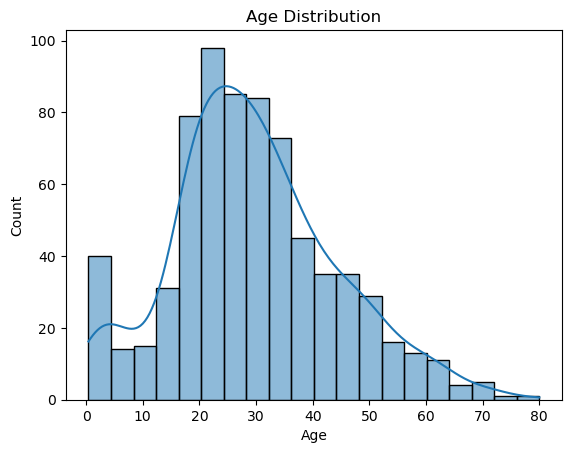

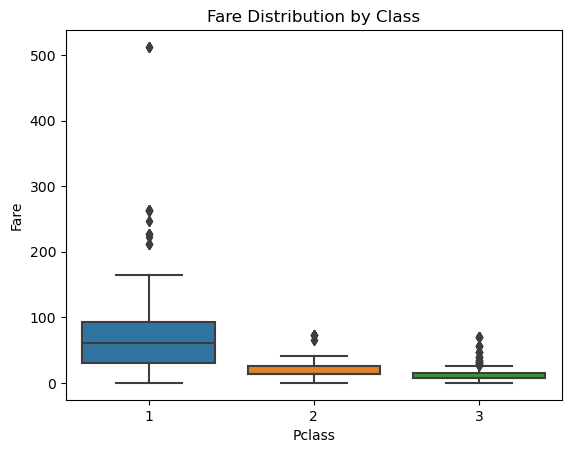

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

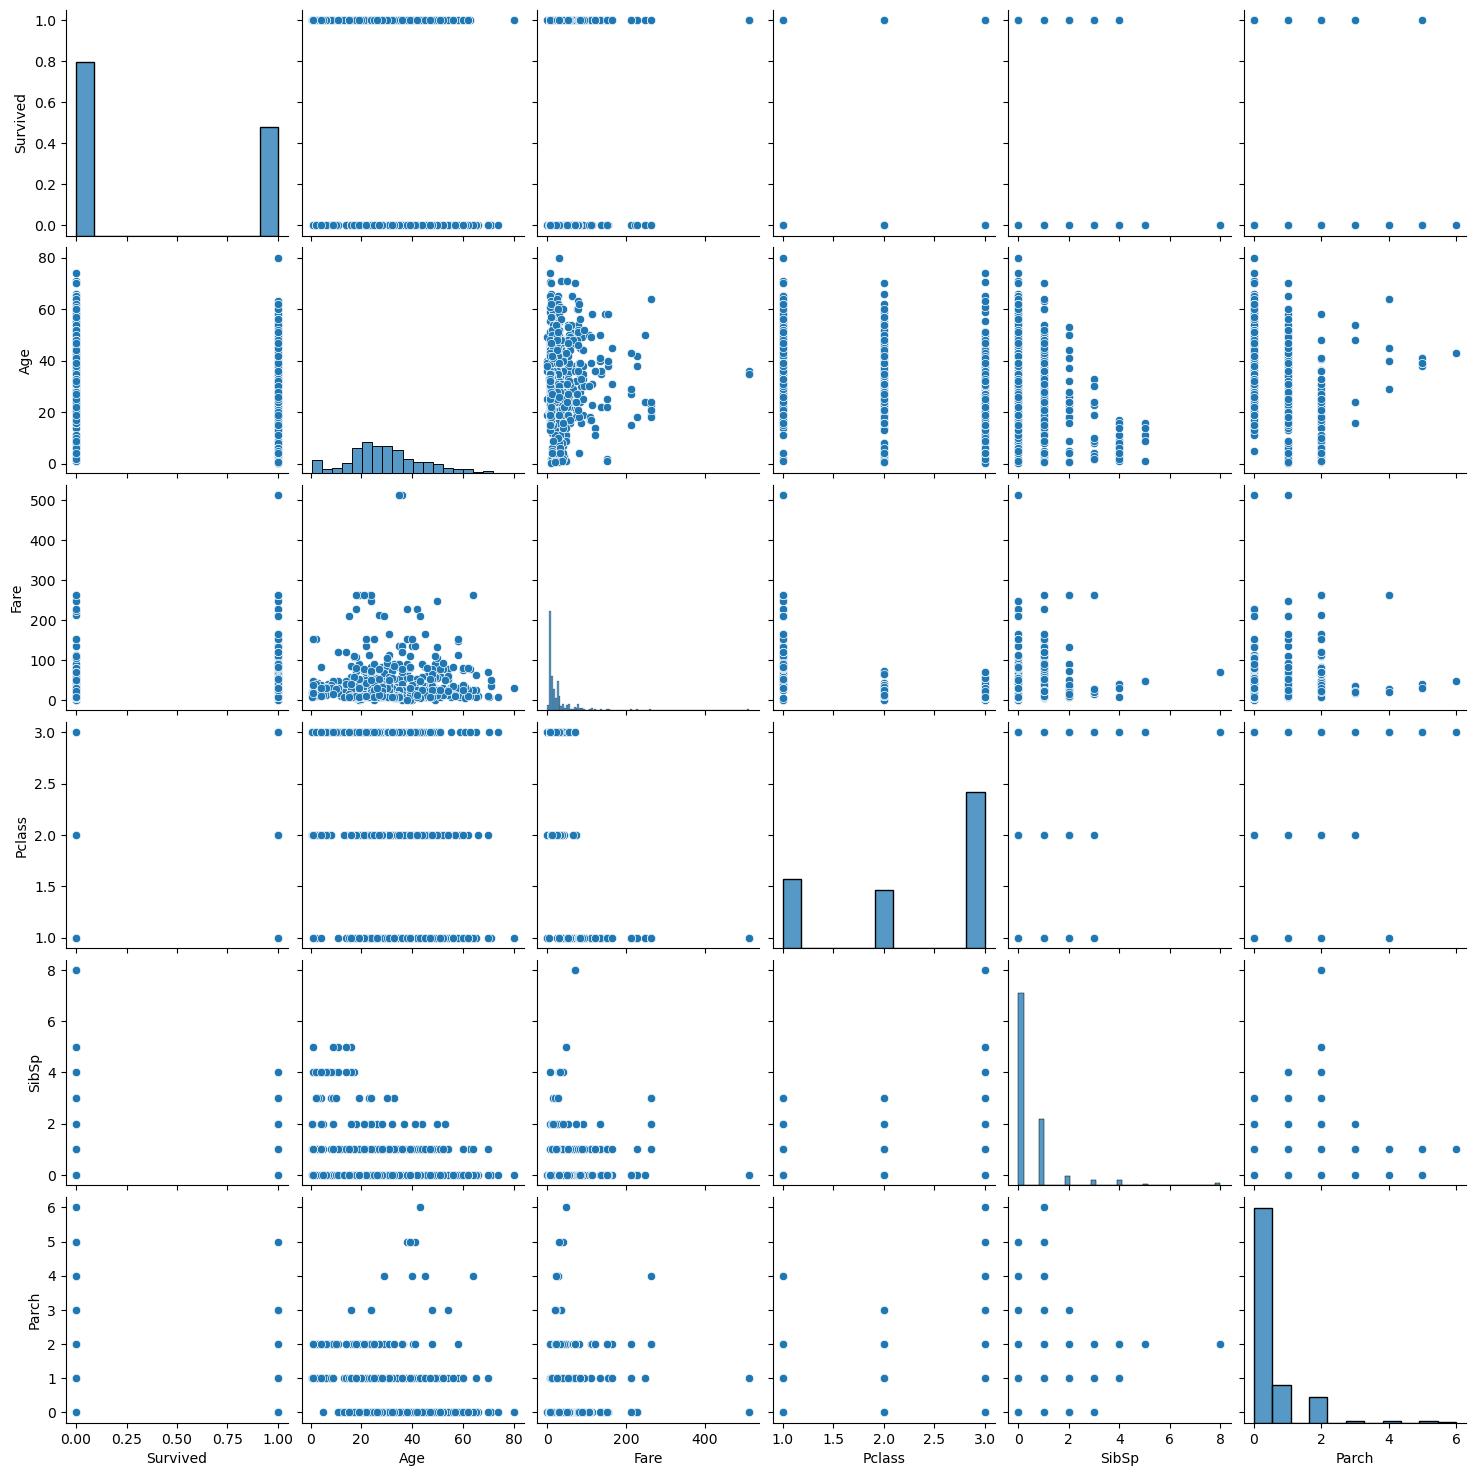

C:\Users\janani\AppData\Local\Temp\ipykernel_14088\2378512280.py:32: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
C:\Users\janani\AppData\Local\Temp\ipykernel_14088\2378512280.py:33: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behav

Accuracy: 0.8100558659217877
Precision: 0.7857142857142857
Recall: 0.7432432432432432
F1 Score: 0.7638888888888888
ROC AUC: 0.8001930501930502


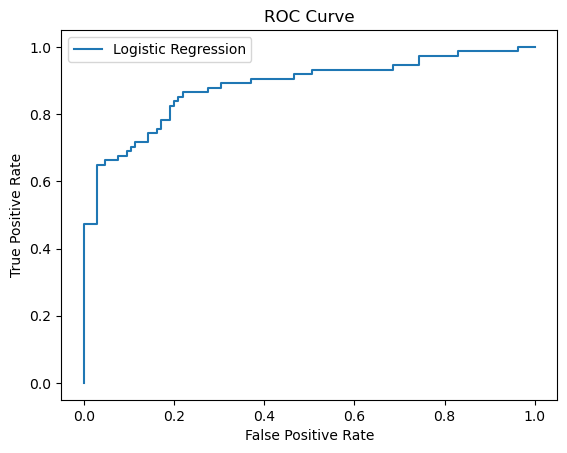

   PassengerId  Survived_Pred  Survived_Prob
0          892              0       0.117274
1          893              0       0.402703
2          894              0       0.128260
3          895              0       0.111583
4          896              1       0.568813
     Pclass       Age     SibSp     Parch      Fare  Sex_male  Embarked_Q  \
0 -0.939807 -0.030637 -0.295141 -0.108254  0.002564 -2.592598   -0.111329   

   Embarked_S  
0   -0.399416  


In [18]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Load the datasets
train_data = pd.read_csv('Titanic_train_logic.csv')
test_data = pd.read_csv('Titanic_test_logic.csv')

# Exploratory Data Analysis (EDA)
print(train_data.describe(include='all'))
print(train_data.info())
print(test_data.describe(include='all'))
print(test_data.info())

# Visualizations
sns.histplot(train_data['Age'].dropna(), kde=True)
plt.title('Age Distribution')
plt.show()

sns.boxplot(x='Pclass', y='Fare', data=train_data)
plt.title('Fare Distribution by Class')
plt.show()

sns.pairplot(train_data[['Survived', 'Age', 'Fare', 'Pclass', 'SibSp', 'Parch']])
plt.show()

# Data Preprocessing
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
test_data['Age'].fillna(test_data['Age'].median(), inplace=True)
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)
test_data['Fare'].fillna(test_data['Fare'].median(), inplace=True)

train_data = pd.get_dummies(train_data, columns=['Sex', 'Embarked'], drop_first=True)
test_data = pd.get_dummies(test_data, columns=['Sex', 'Embarked'], drop_first=True)

features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Embarked_Q', 'Embarked_S']
target = 'Survived'

# Splitting the training data into train and validation sets
X = train_data[features]
y = train_data[target]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Building
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict on validation set
y_val_pred = model.predict(X_val)

# Calculate evaluation metrics
accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)
roc_auc = roc_auc_score(y_val, y_val_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'ROC AUC: {roc_auc}')

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_val, model.predict_proba(X_val)[:, 1])
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Predict on test data (without 'Survived' column)
X_test = test_data[features]
y_test_pred = model.predict(X_test)

# If you want probabilities
y_test_pred_proba = model.predict_proba(X_test)[:, 1]

# Save predictions to a DataFrame and print them
predictions = pd.DataFrame({
    'PassengerId': test_data['PassengerId'],
    'Survived_Pred': y_test_pred,
    'Survived_Prob': y_test_pred_proba
})

# Print the first few rows of the predictions
print(predictions.head())

# Save the predictions to a CSV file
predictions.to_csv('Titanic_test_predictions_values.csv', index=False)

# Extract model coefficients
coefficients = pd.DataFrame(model.coef_.reshape(-1, len(features)), columns=features)
print(coefficients)


## What is the difference between precision and recall?
Precision and recall are both metrics used to measure the performance of algorithms or models. Precision is a measure of quality, while recall is a measure of quantity:
Precision
The percentage of correctly predicted instances out of the total number of cases. Higher precision means that the algorithm returns more relevant results than irrelevant ones.
Recall
The percentage of correctly predicted instances out of the total number of relevant cases. Higher recall means that the algorithm returns most of the relevant results, even if it also returns some irrelevant ones.

## What is cross-validation, and why is it important in binary classification?
Cross-validation is a technique used to evaluate the performance of a machine learning model by dividing the dataset into multiple subsets or "folds." In each iteration, the model is trained on a portion of the data and tested on a different portion. This process is repeated multiple times, allowing for a more reliable assessment of model performance.

It's important in binary classification because it helps ensure the model generalizes well to unseen data, reduces overfitting, and provides a more accurate estimate of performance metrics, especially when dealing with imbalanced datasets.